### Oxford Flower Image Datasetを用いた深層学習ハンズオン

```

神沼英里(国立遺伝学研究所、産業総合技術研究所)

第59回日本植物生理学会年会　データベース講習会
2018年3月29日(木) 10:30-12:00 
札幌コンベンションセンター J会場
```
   - [slideshare資料](https://www.slideshare.net/ekaminuma/20180329oxford-flower-image-dataset)


In [1]:
import scipy.io
#-------画像データ読み込み-----------------------
mat = scipy.io.loadmat('eL3_Ox3CL.mat');

#--データファイルの説明---------------------------
#
#+++++++[1]データ形式++++++++++++++++++++++++++++
#  データはmatlabの(.mat)形式で、構造体(仮に変数名をtmpとする)
#  として下記の4変数が格納されています。
#  (1)tmp.x1 = train画像群(416, 64, 164, 3)　
#  (2)tmp.x2 = test画像群(81, 64, 64, 3)
#  (3)tmp.y1 = train注釈：分類ラベル(416,1) 
#  (4)tmp.y2 = test注釈:分類ラベル(81,1)
#
#++++++[2]画像データ(x1,x2)+++++++++++++++++++++++
#  1つの画像は縦横サイズが64,64で、RGBの3チャネルです。
#  各画像サイズは(64,64,3)になります。train画像群の場合は
#  3クラスの計416枚(167枚,139枚,110枚),を1つの変数x1に入れたので、
#  変数のサイズは(416,128,128,3)になります。
#
#+++++[3]分類ラベルデータ(y1,y2)+++++++++++++++++++++++  
#  画像注釈の分類ラベルには、クラス番号（0,1,2）が格納されています。
#  クラス0=water lily,クラス1=frangipani,クラス3=lotus
#
#+++++[4]訓練データ変数の作成+++++++++++++++++++++++++
#  訓練データの変数の作成（tmp.x1からx_trainへの変換名変更）は、
#  後続セルの「画像データ(X)と注釈(Y)準備」を参照してください
#

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

#-----学習用パラメータ-------------------
batch_size = 32 #訓練データ小分け
num_classes = 3 #クラス数(3植物種)
epochs = 6 #学習回数

#----画像サイズ設定------------------- 
img_rows, img_cols = 64, 64
input_shape = (img_rows, img_cols, 3)

#----画像データ(X)と注釈(Y)準備------------ 
x_train = mat['x1']
x_test = mat['x2']
y_train = mat['y1']
y_test = mat['y2']

#-----画像データのRGB値[0-255]を[0-1]に変換----------------------
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

#----クラス番号0,1,2をバイナリ[1,0,0][0,1,0][0,0,1]に変換-------
y_test_org = y_test
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#--------modelの定義------------------------------------- 
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), 
                 input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',#損失関数
              optimizer='adam', #最適化手法
              metrics=['accuracy']) #評価関数

#--------modelを学習----------------------------------
history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

#--------modelの評価---------------------------------
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: %0.03f' % score[0])
print('Test accuracy: %0.03f' % score[1])

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


x_train shape: (416, 64, 64, 3)
416 train samples
81 test samples
Train on 416 samples, validate on 81 samples
Epoch 1/6
416/416 [==============================] - 13s 31ms/step - loss: 1.1003 - acc: 0.4663 - val_loss: 1.1553 - val_acc: 0.3333
Epoch 2/6
416/416 [==============================] - 13s 30ms/step - loss: 1.0491 - acc: 0.4712 - val_loss: 1.0828 - val_acc: 0.3333
Epoch 3/6
416/416 [==============================] - 13s 31ms/step - loss: 0.9735 - acc: 0.4712 - val_loss: 1.0051 - val_acc: 0.3457
Epoch 4/6
416/416 [==============================] - 13s 30ms/step - loss: 0.8568 - acc: 0.5312 - val_loss: 0.8637 - val_acc: 0.6296
Epoch 5/6
416/416 [==============================] - 13s 31ms/step - loss: 0.7449 - acc: 0.6418 - val_loss: 0.7919 - val_acc: 0.6790
Epoch 6/6
416/416 [==============================] - 13s 31ms/step - loss: 0.6633 - acc: 0.7139 - val_loss: 0.7735 - val_acc: 0.7160
Test loss: 0.773
Test accuracy: 0.716


評価尺度Accuracyの定義
$$
\begin{eqnarray}
Accuracy &=& {\frac{TP+FN}{TP+FP+TN+FN}} 
\end{eqnarray}
$$

$$
\begin{array}{|c||c|c|}
　　 & Predicted:YES & Predicted:NO \\\hline 
Actual:YES & [True~Positive(TP)] &[False~Negative(FN)] \\\
Actual:NO & [False~Positive(FP)] &
[True~Negative(TN)]
\end{array}
$$

In [3]:
y_pred = model.predict_classes(x_test) #予測値y_predの計算


81/81 [==============================] - 1s 11ms/step


In [4]:
#--混同行列の計算 ----------------------
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print(y_pred.shape)
print(y_test_org.shape)
pd.crosstab(y_test_org.flatten(),y_pred,rownames=['True'],colnames=['Pred'],margins=True) #混同行列


(81,)
(81, 1)


Pred,0,1,2,All
True,,,,
0,24,2,1,27
1,8,19,0,27
2,9,3,15,27
All,41,24,16,81


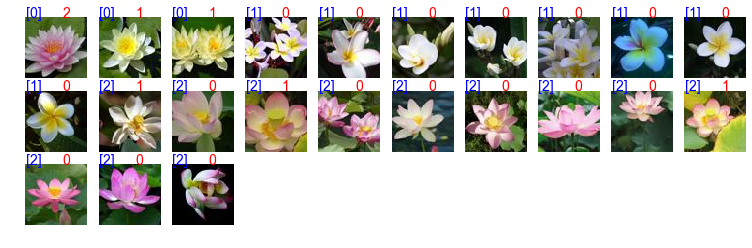

In [5]:
#---不正解ラベルの画像を視覚化-------------------------

import matplotlib.pyplot as plt
%matplotlib inline 

test_wrong = [im for im in zip(x_test,y_pred,y_test_org) if im[1] != im[2]]

plt.figure(figsize=(10, 10))
for ind, val in enumerate(test_wrong[:30]):
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    plt.subplot(10, 10, ind + 1)
    im_flower = val[0]
    plt.axis("off")
    plt.text(0, 0, val[2], fontsize=14, color='blue')#正解ラベル
    plt.text(38, 0, val[1], fontsize=14, color='red')#予測ラベル
    plt.imshow(im_flower) 

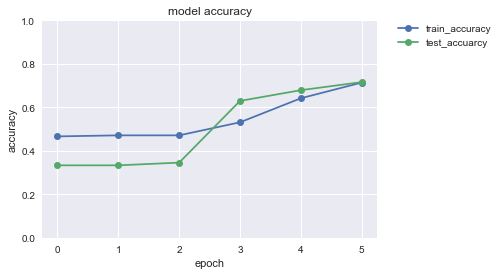

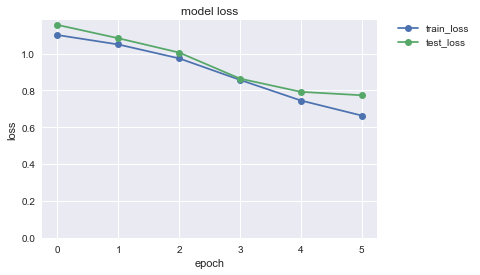

In [6]:
#---評価関数(Accuracy)の変化を視覚化----------------------
plt.plot(history.history['acc'],"o-",label="train_accuracy")
plt.plot(history.history['val_acc'],"o-",label="test_accuarcy")
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.ylim(0, 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#---損失関数の変化を視覚化----------------------
plt.plot(history.history['loss'],"o-",label="train_loss",)
plt.plot(history.history['val_loss'],"o-",label="test_loss")
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.ylim(ymin=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [7]:
#----model architectureを確認---------------------
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 32)        18464     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 58, 58, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 27, 27, 16)        4624      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 25, 25, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 16)        0         
__________